<a href="https://colab.research.google.com/github/vedantsawant/CSE512-ML-Project/blob/main/RockPaperScissors%20Architecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile  
from tensorflow.keras import regularizers

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-11-28 06:06:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M  41.4MB/s    in 5.3s    

2022-11-28 06:06:34 (36.2 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]

--2022-11-28 06:06:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps

In [ ]:
zip_ref_train = zipfile.ZipFile('/content/rps.zip')
zip_ref_train.extractall()
zip_ref_train.close()

zip_ref_test = zipfile.ZipFile('/content/rps-test-set.zip')
zip_ref_test.extractall()
zip_ref_test.close()

In [ ]:
train_dir = '/content/rps'
test_dir = '/content/rps-test-set'

train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock') 
train_scissors_dir = os.path.join(train_dir, 'scissors')

test_paper_dir = os.path.join(test_dir, 'paper')
test_rock_dir = os.path.join(test_dir, 'rock') 
test_scissors_dir = os.path.join(test_dir, 'scissors')

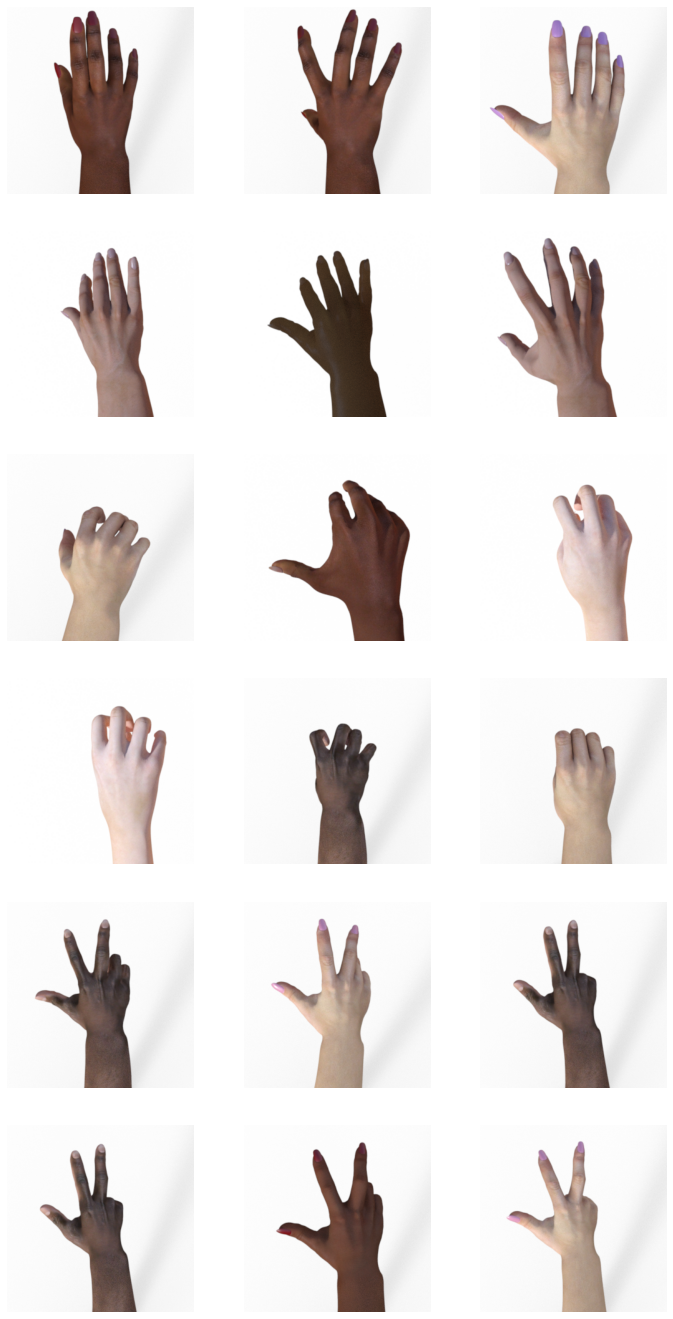

In [ ]:
ncols = 6
nrows = 3
index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

index += 6
next_paper_pix = [os.path.join(train_paper_dir, fname) for fname in os.listdir(train_paper_dir)[index-6 : index]]
next_rock_pix = [os.path.join(train_rock_dir, fname) for fname in os.listdir(train_rock_dir)[index-6 : index]]
next_scissors_pix = [os.path.join(train_scissors_dir, fname) for fname in os.listdir(train_scissors_dir)[index-6 : index]]

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
  sp = plt.subplot(ncols, nrows, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [ ]:
print(len(os.listdir(train_paper_dir))+len(os.listdir(train_rock_dir))+len(os.listdir(train_scissors_dir)))
print(len(os.listdir(test_paper_dir))+len(os.listdir(test_rock_dir))+len(os.listdir(test_scissors_dir)))

2520
372


### Base Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 756ms/step - loss: 1.0298 - accuracy: 0.4775 - val_loss: 1.3042 - val_accuracy: 0.3594
Epoch 2/50
8/8 [==============================] - 6s 706ms/step - loss: 0.5663 - accuracy: 0.7393 - val_loss: 0.8923 - val_accuracy: 0.6562
Epoch 3/50
8/8 [==============================] - 6s 713ms/step - loss: 0.1927 - accuracy: 0.9268 - val_loss: 0.8610 - val_accuracy: 0.6992
Epoch 4/50
8/8 [==============================] - 6s 709ms/step - loss: 0.0565 - accuracy: 0.9805 - val_loss: 1.3054 - val_accuracy: 0.7383
Epoch 5/50
8/8 [==============================] - 6s 712ms/step - loss: 0.0351 - accuracy: 0.9863 - val_loss: 1.3611 - val_accuracy: 0.7734
Epoch 6/50
8/8 [==============================] - 6s 686ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 2.0255 - val_accuracy: 0.7539
Epoch 7/50
8/8 [==============================] - 6s 723ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.9316 - val_accuracy: 0.7383
Epoch 8/50
8/8 [====

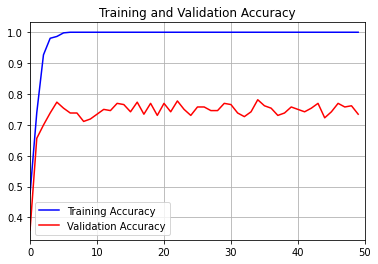

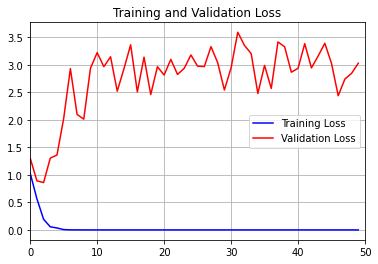

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### L1 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 759ms/step - loss: 10.7508 - accuracy: 0.3701 - val_loss: 9.8023 - val_accuracy: 0.4648
Epoch 2/50
8/8 [==============================] - 6s 722ms/step - loss: 8.9140 - accuracy: 0.6392 - val_loss: 8.2799 - val_accuracy: 0.4922
Epoch 3/50
8/8 [==============================] - 6s 703ms/step - loss: 7.2345 - accuracy: 0.8242 - val_loss: 6.9597 - val_accuracy: 0.5547
Epoch 4/50
8/8 [==============================] - 6s 710ms/step - loss: 5.8694 - accuracy: 0.9170 - val_loss: 5.5532 - val_accuracy: 0.7812
Epoch 5/50
8/8 [==============================] - 6s 708ms/step - loss: 4.7186 - accuracy: 0.9775 - val_loss: 4.4186 - val_accuracy: 0.9414
Epoch 6/50
8/8 [==============================] - 6s 714ms/step - loss: 3.7506 - accuracy: 0.9971 - val_loss: 3.5772 - val_accuracy: 0.8789
Epoch 7/50
8/8 [==============================] - 6s 688ms/step - loss: 2.9514 - accuracy: 0.9898 - val_loss: 2.9203 - val_accuracy: 0.8398
Epoch 8/50
8/8 [===

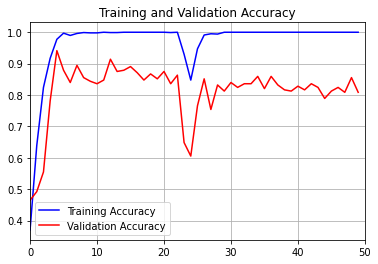

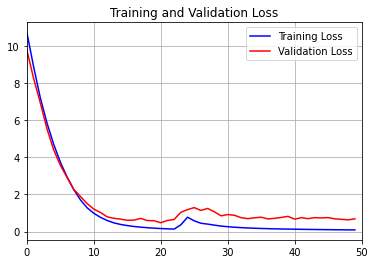

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### L2 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 737ms/step - loss: 1.7065 - accuracy: 0.3780 - val_loss: 1.6043 - val_accuracy: 0.3125
Epoch 2/50
8/8 [==============================] - 6s 703ms/step - loss: 1.3450 - accuracy: 0.5811 - val_loss: 1.7448 - val_accuracy: 0.4883
Epoch 3/50
8/8 [==============================] - 6s 706ms/step - loss: 1.0540 - accuracy: 0.7246 - val_loss: 1.2008 - val_accuracy: 0.6406
Epoch 4/50
8/8 [==============================] - 6s 715ms/step - loss: 0.7186 - accuracy: 0.8343 - val_loss: 1.0292 - val_accuracy: 0.7344
Epoch 5/50
8/8 [==============================] - 6s 718ms/step - loss: 0.5024 - accuracy: 0.9365 - val_loss: 1.0188 - val_accuracy: 0.7852
Epoch 6/50
8/8 [==============================] - 6s 712ms/step - loss: 0.3387 - accuracy: 0.9697 - val_loss: 0.9379 - val_accuracy: 0.8438
Epoch 7/50
8/8 [==============================] - 6s 713ms/step - loss: 0.2634 - accuracy: 0.9854 - val_loss: 1.0826 - val_accuracy: 0.8086
Epoch 8/50
8/8 [====

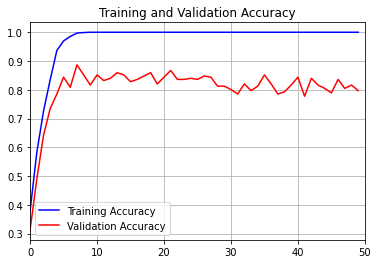

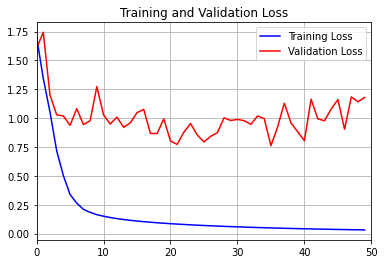

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 22s 3s/step - loss: 1.1325 - accuracy: 0.3384 - val_loss: 1.1003 - val_accuracy: 0.3008
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 1.0938 - accuracy: 0.3638 - val_loss: 1.0981 - val_accuracy: 0.3164
Epoch 3/50
8/8 [==============================] - 21s 3s/step - loss: 1.0731 - accuracy: 0.4065 - val_loss: 0.9953 - val_accuracy: 0.6406
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 0.9965 - accuracy: 0.4970 - val_loss: 0.8560 - val_accuracy: 0.6758
Epoch 5/50
8/8 [==============================] - 22s 3s/step - loss: 0.8664 - accuracy: 0.6006 - val_loss: 0.5684 - val_accuracy: 0.6875
Epoch 6/50
8/8 [==============================] - 21s 3s/step - loss: 0.6692 - accuracy: 0.6789 - val_loss: 0.3599 - val_accuracy: 0.9180
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 0.5562 - accuracy: 0.7673 - val_loss: 0.2929 - val_accuracy: 0.9414
Epoch 8/50
8/8 [==================

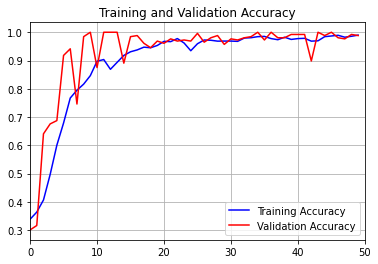

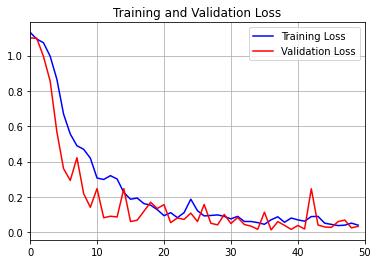

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Dropout

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 728ms/step - loss: 1.1401 - accuracy: 0.3913 - val_loss: 1.0828 - val_accuracy: 0.3906
Epoch 2/50
8/8 [==============================] - 6s 704ms/step - loss: 0.8637 - accuracy: 0.6230 - val_loss: 0.9605 - val_accuracy: 0.5234
Epoch 3/50
8/8 [==============================] - 6s 686ms/step - loss: 0.4139 - accuracy: 0.8313 - val_loss: 0.6798 - val_accuracy: 0.7344
Epoch 4/50
8/8 [==============================] - 6s 701ms/step - loss: 0.1564 - accuracy: 0.9434 - val_loss: 0.8440 - val_accuracy: 0.7266
Epoch 5/50
8/8 [==============================] - 6s 703ms/step - loss: 0.0658 - accuracy: 0.9766 - val_loss: 0.6633 - val_accuracy: 0.8320
Epoch 6/50
8/8 [==============================] - 5s 680ms/step - loss: 0.0343 - accuracy: 0.9858 - val_loss: 0.8995 - val_accuracy: 0.8633
Epoch 7/50
8/8 [==============================] - 6s 709ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 1.1374 - val_accuracy: 0.8047
Epoch 8/50
8/8 [====

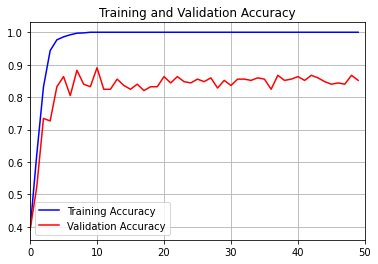

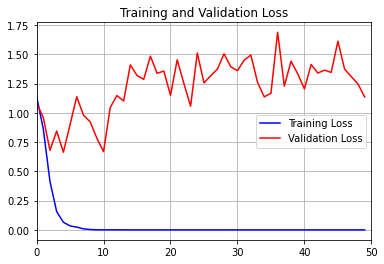

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

###DropConnect

When training with Dropout, a randomly selected subset of activations are set to zero within each layer.

In [ ]:
!pip install dropconnect-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
from dropconnect_tensorflow import DropConnectDense

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             DropConnectDense(units=64, prob=0.2, activation="relu", use_bias=True),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 1.1590 - accuracy: 0.3161 - val_loss: 1.0949 - val_accuracy: 0.3594
Epoch 2/50
8/8 [==============================] - 7s 849ms/step - loss: 1.0784 - accuracy: 0.4482 - val_loss: 1.0673 - val_accuracy: 0.5547
Epoch 3/50
8/8 [==============================] - 6s 685ms/step - loss: 0.8766 - accuracy: 0.6148 - val_loss: 0.9924 - val_accuracy: 0.5703
Epoch 4/50
8/8 [==============================] - 6s 692ms/step - loss: 0.5180 - accuracy: 0.7957 - val_loss: 0.8384 - val_accuracy: 0.6406
Epoch 5/50
8/8 [==============================] - 6s 715ms/step - loss: 0.2333 - accuracy: 0.9336 - val_loss: 0.4919 - val_accuracy: 0.8750
Epoch 6/50
8/8 [==============================] - 6s 681ms/step - loss: 0.0798 - accuracy: 0.9766 - val_loss: 0.4602 - val_accuracy: 0.8242
Epoch 7/50
8/8 [==============================] - 6s 701ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.5676 - val_accuracy: 0.8398
Epoch 8/50
8/8 [=======

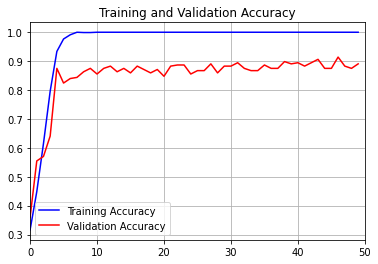

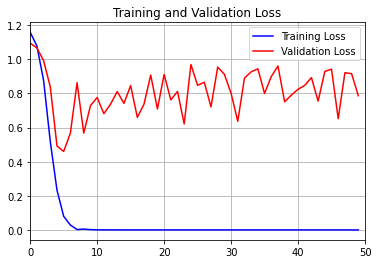

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()